In [15]:
# Dependencies
import pandas as pd                     # for handling and structuring data
import matplotlib.pyplot as plt         # for creating plots
import matplotlib.ticker as ticker
import scipy.stats as st                # for statistical functions
import numpy as np                      # for generating random numbers and handling numerical operations
from scipy.stats import linregress      # for calculating linear regression

# need to switch to csv
# Load the CSV file
file_path = 'Resources/new_data.csv'
csv_df = pd.read_csv(file_path, header=0)

# Display sheet names to identify relevant data
print(csv_df)

                                Track                        Album Name  \
0                 MILLION DOLLAR BABY      Million Dollar Baby - Single   
1                         Not Like Us                       Not Like Us   
2          i like the way you kiss me        I like the way you kiss me   
3                             Flowers                  Flowers - Single   
4                             Houdini                           Houdini   
...                               ...                               ...   
4595                For the Last Time                 For the Last Time   
4596                 Dil Meri Na Sune  Dil Meri Na Sune (From "Genius")   
4597            Grace (feat. 42 Dugg)                           My Turn   
4598              Nashe Si Chadh Gayi             November Top 10 Songs   
4599  Me Acostumbre (feat. Bad Bunny)   Me Acostumbre (feat. Bad Bunny)   

              Artist Release Date All Time Rank Spotify Streams  \
0      Tommy Richman    4/26/202

In [16]:
# Select relevant columns

columns_to_select=['Track', 'Album Name', 'Artist', 'Release Date', 'All Time Rank','Spotify Popularity', 'TikTok Likes', 'Explicit Track']

spotify_likes_data = csv_df[columns_to_select]

spotify_likes_data.head()

,Track,Album Name,Artist,Release Date,All Time Rank,Spotify Popularity,TikTok Likes,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,1,92.0,"651,565,900",0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,2,92.0,"35,223,547",1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,3,92.0,"275,154,237",0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,4,85.0,"1,078,757,968",0
4,Houdini,Houdini,Eminem,5/31/2024,5,88.0,NaN,1


In [17]:
# Show count of each column
spotify_likes_data.count()

Track                 4600
Album Name            4600
Artist                4595
Release Date          4600
All Time Rank         4600
Spotify Popularity    3796
TikTok Likes          3620
Explicit Track        4600
dtype: int64

In [18]:
# Drop blank rows
spotify_likes_data_clean = spotify_likes_data.dropna()
spotify_likes_data_clean.count()

Track                 3309
Album Name            3309
Artist                3309
Release Date          3309
All Time Rank         3309
Spotify Popularity    3309
TikTok Likes          3309
Explicit Track        3309
dtype: int64

In [19]:
# Show new data
print(spotify_likes_data_clean.dtypes)

Track                  object
Album Name             object
Artist                 object
Release Date           object
All Time Rank          object
Spotify Popularity    float64
TikTok Likes           object
Explicit Track          int64
dtype: object


In [20]:
# Conversion to start
print("Before conversion:")
print(spotify_likes_data_clean[['TikTok Likes', 'All Time Rank', 'Spotify Popularity']].count())

Before conversion:
TikTok Likes          3309
All Time Rank         3309
Spotify Popularity    3309
dtype: int64


In [21]:
# Function to convert to numeric
def convert_to_numeric(value):
    if pd.isna(value):
        return np.nan
    try:
        # Remove commas and convert to float
        return float(str(value).replace(',', ''))
    except ValueError:
        return np.nan

# Apply the conversion to both columns
spotify_likes_data_clean['TikTok Likes'] = spotify_likes_data_clean['TikTok Likes'].apply(convert_to_numeric)
spotify_likes_data_clean['All Time Rank'] = spotify_likes_data_clean['All Time Rank'].apply(convert_to_numeric)

# Check the results
print("After conversion:")
print(spotify_likes_data_clean[['TikTok Likes', 'All Time Rank', 'Spotify Popularity']].dtypes)
print(spotify_likes_data_clean[['TikTok Likes', 'All Time Rank', 'Spotify Popularity']].count())

# Check for any remaining non-numeric values
print("\nNon-numeric values in TikTok Likes:")
print(spotify_likes_data_clean[pd.isna(spotify_likes_data_clean['TikTok Likes'])]['TikTok Likes'].head())

print("\nNon-numeric values in All Time Rank:")
print(spotify_likes_data_clean[pd.isna(spotify_likes_data_clean['All Time Rank'])]['All Time Rank'].head())

# Display sample of original values
print("\nSample of original TikTok Likes values:")
print(spotify_likes_data_clean['TikTok Likes'].head())

print("\nSample of original All Time Rank values:")
print(spotify_likes_data_clean['All Time Rank'].head())

After conversion:
TikTok Likes          float64
All Time Rank         float64
Spotify Popularity    float64
dtype: object
TikTok Likes          3309
All Time Rank         3309
Spotify Popularity    3309
dtype: int64

Non-numeric values in TikTok Likes:
Series([], Name: TikTok Likes, dtype: float64)

Non-numeric values in All Time Rank:
Series([], Name: All Time Rank, dtype: float64)

Sample of original TikTok Likes values:
0    6.515659e+08
1    3.522355e+07
2    2.751542e+08
3    1.078758e+09
5    2.149435e+08
Name: TikTok Likes, dtype: float64

Sample of original All Time Rank values:
0    1.0
1    2.0
2    3.0
3    4.0
5    6.0
Name: All Time Rank, dtype: float64


C:\Users\rdina\AppData\Local\Temp\ipykernel_12700\2345013518.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_likes_data_clean['TikTok Likes'] = spotify_likes_data_clean['TikTok Likes'].apply(convert_to_numeric)
C:\Users\rdina\AppData\Local\Temp\ipykernel_12700\2345013518.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_likes_data_clean['All Time Rank'] = spotify_likes_data_clean['All Time Rank'].apply(convert_to_numeric)


In [22]:
# Sort by TikTok Likes
tik_tok_sort = spotify_likes_data_clean.sort_values(by='TikTok Likes', ascending=True)

tik_tok_sort.to_csv('check.csv',index=False)

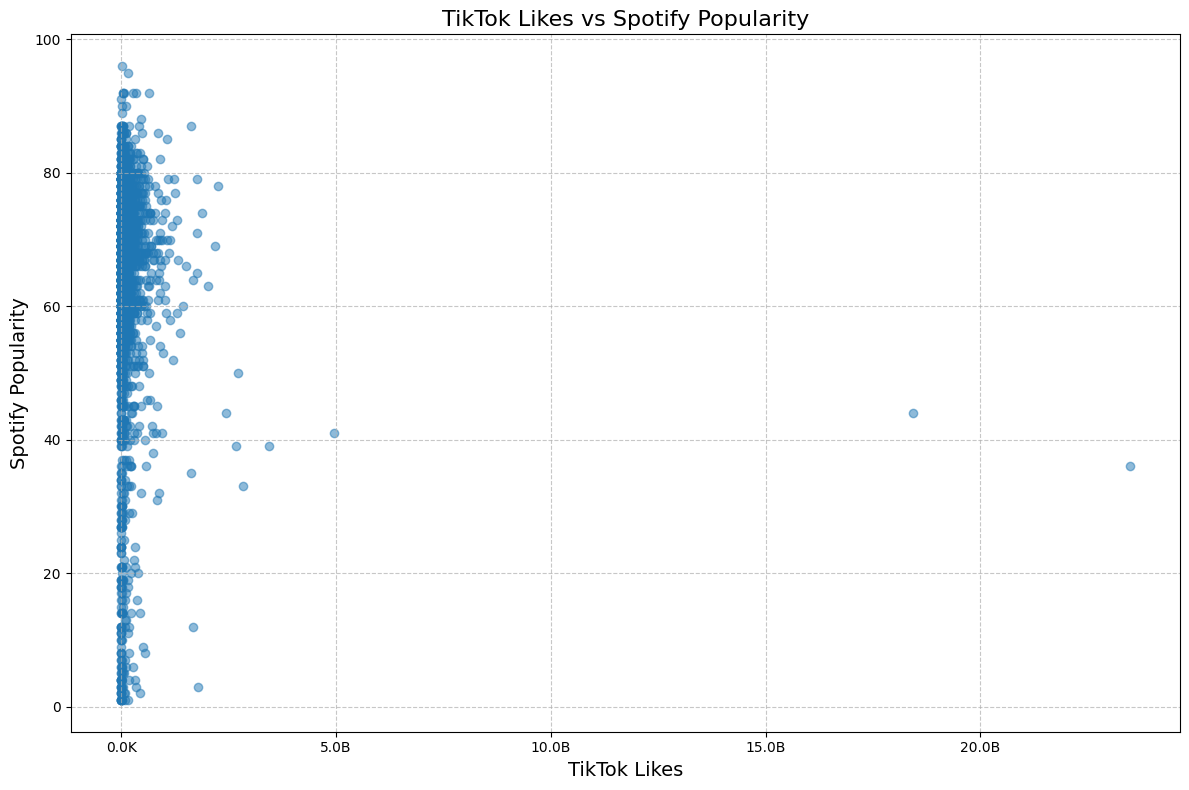

Correlation between TikTok Likes and Spotify Popularity: -0.0470


In [23]:
def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x/1e3:.1f}K'

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(spotify_likes_data_clean['TikTok Likes'], 
            spotify_likes_data_clean['Spotify Popularity'], 
            alpha=0.5)  # alpha for transparency

# Set labels and title
plt.xlabel('TikTok Likes', fontsize=14)
plt.ylabel('Spotify Popularity', fontsize=14)
plt.title('TikTok Likes vs Spotify Popularity', fontsize=16)

# Format x-axis ticks
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation
correlation = spotify_likes_data_clean['TikTok Likes'].corr(spotify_likes_data_clean['Spotify Popularity'])
print(f"Correlation between TikTok Likes and Spotify Popularity: {correlation:.4f}")

#### The correlation coefficient of -0.0470 between TikTok Likes and Spotify Popularity indicates there is a weak correlation between these two factors. With the value being so close to 0 and in the negative, there is a slight tedency for Spotify Popularity to decrease as TikTok likes increase and vice versa. Still, it is not a significant enough correlation for it to matter when anticipating artist popularity. The near zero correlation also suggests these are two completely independent variables. 

#### From this data analysis, we can conclude that an artit that is not popular on TikTok based on likes may be very popular on Spotify. This may also suggest that engagement cultures and functions with each platform result in in TikTok and Spotify are completely opposite results from each other. Ultimately, there may be different strategies required for success on each platform.

### Further research into other factors and artist characteristics impacting popularity (i.e. - social media engagement, age, sex, gender, genre) could yield stronger correlational data or even causational explanations for an artist's popularity. 

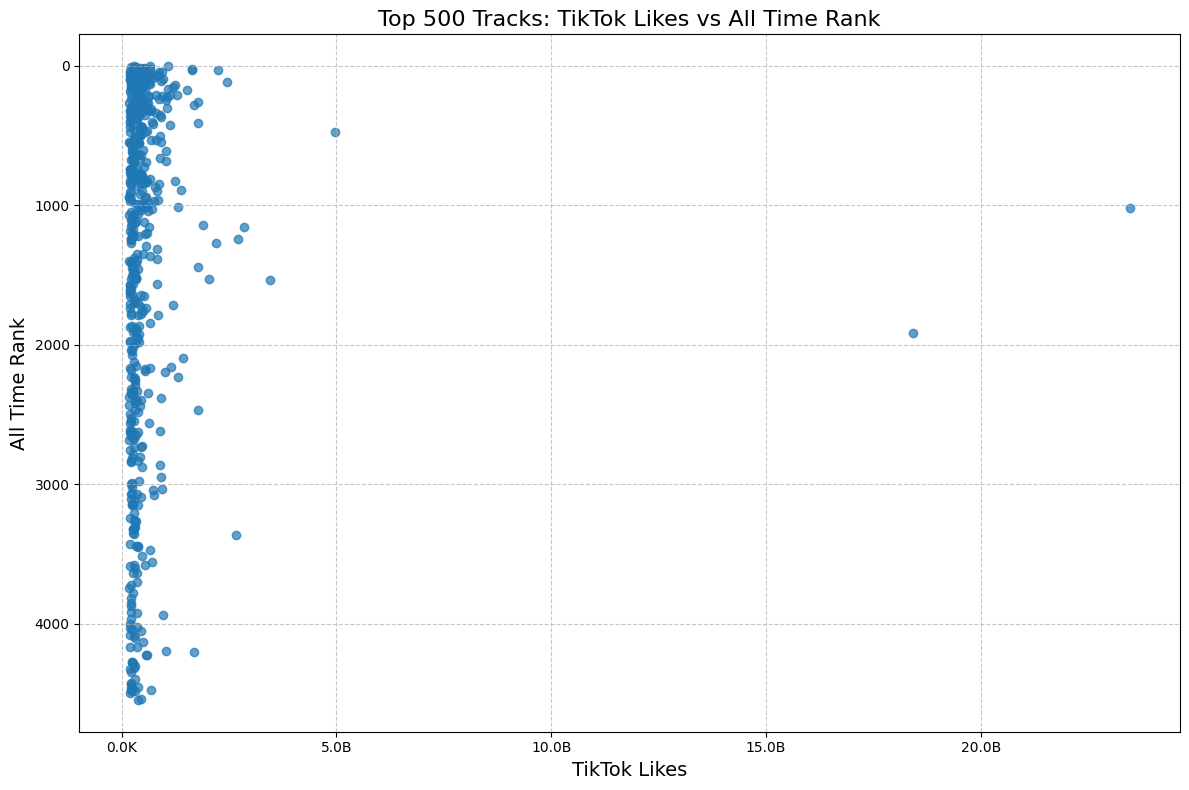

Correlation between TikTok Likes and All Time Rank for top 500: -0.0553

Statistics for Top 500 tracks:
Average TikTok Likes: 563,284,838
Average All Time Rank: 1518.75
Highest TikTok Likes: 23,474,223,833
Best (Lowest) All Time Rank: 1


In [24]:
# Sort the dataframe by TikTok Likes in descending order and take the top 500
top_500 = spotify_likes_data_clean.sort_values('TikTok Likes', ascending=False).head(500)

def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x/1e3:.1f}K'

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(top_500['TikTok Likes'], 
            top_500['All Time Rank'], 
            alpha=0.7)

# Set labels and title
plt.xlabel('TikTok Likes', fontsize=14)
plt.ylabel('All Time Rank', fontsize=14)
plt.title('Top 500 Tracks: TikTok Likes vs All Time Rank', fontsize=16)

# Format x-axis ticks
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Invert y-axis so that lower ranks (better) are at the top
plt.gca().invert_yaxis()

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation for the top 500
correlation = top_500['TikTok Likes'].corr(top_500['All Time Rank'])
print(f"Correlation between TikTok Likes and All Time Rank for top 500: {correlation:.4f}")

# Print some statistics
print("\nStatistics for Top 500 tracks:")
print(f"Average TikTok Likes: {top_500['TikTok Likes'].mean():,.0f}")
print(f"Average All Time Rank: {top_500['All Time Rank'].mean():.2f}")
print(f"Highest TikTok Likes: {top_500['TikTok Likes'].max():,.0f}")
print(f"Best (Lowest) All Time Rank: {top_500['All Time Rank'].min():.0f}")

#### The correlation coefficient of 0.0253 between TikTok Likes and All Time Ranking indicates there is a weak correlation between these two factors. With the value being so close to 0 and in the positive, there is a slight tedency for Spotify Popularity to increase as TikTok likes increase and vice versa. Still, it is not a significant enough correlation for it to matter when anticipating artist popularity. The near zero correlation also suggests these are two completely independent variables. From this data analysis, we can conclude that an artit that is not popular on TikTok based on likes may be very popular on Spotify. This may also suggest that engagement cultures and functions with each platform result in in TikTok and Spotify are completely opposite results from each other. Ultimately, there may be different strategies required for success on each platform.

#### Some tracks that are hugely popular on TikTok also rank very high in the All Time Rank (as evidenced by the best rank of 1), but this isn't a consistent trend across all tracks. The lack of correlation suggests that success on TikTok doesn't necessarily translate to a better All Time Rank, and vice versa. The data includes at least one track that's both extremely popular on TikTok and tops the All Time Rank, showing it's possible to excel on both metrics, but it serves as an outlier rather than a predictive possibility. 

### This analysis suggests that while TikTok can be a powerful platform for music promotion, it's not the only factor in a track's overall popularity or longevity as measured by the All Time Rank. Other factors, such as radio play, streaming on other platforms, critical acclaim, or long-term cultural impact, likely play significant roles in determining a track's All Time Rank.

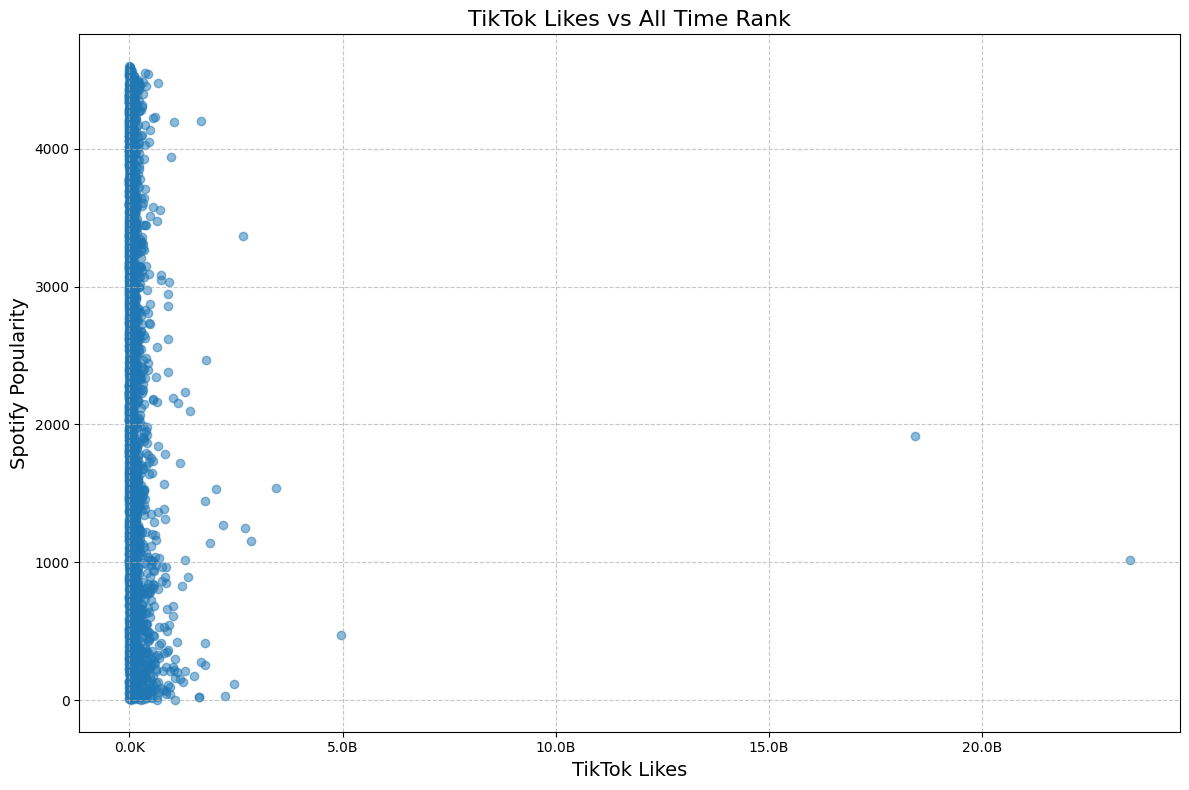

Correlation between TikTok Likes and All Time Rank: -0.1068


In [25]:
# Tickers formatting so as to not impact data analysis
def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x/1e3:.1f}K'

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(spotify_likes_data_clean['TikTok Likes'], 
            spotify_likes_data_clean['All Time Rank'], 
            alpha=0.5)  # alpha for transparency

# Set labels and title
plt.xlabel('TikTok Likes', fontsize=14)
plt.ylabel('Spotify Popularity', fontsize=14)
plt.title('TikTok Likes vs All Time Rank', fontsize=16)

# Format x-axis ticks
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation
correlation = spotify_likes_data_clean['TikTok Likes'].corr(spotify_likes_data_clean['All Time Rank'])
print(f"Correlation between TikTok Likes and All Time Rank: {correlation:.4f}")

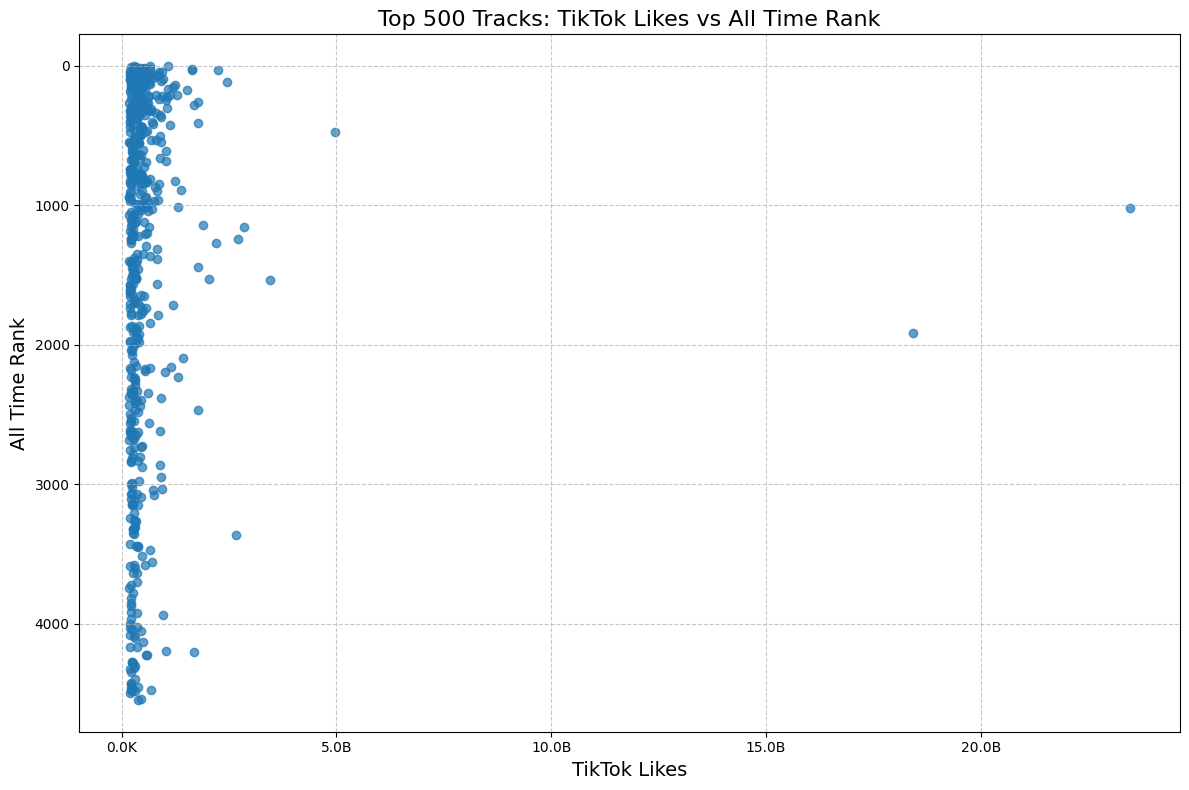

Correlation between TikTok Likes and All Time Rank for top 500: -0.0553

Statistics for Top 500 tracks:
Average TikTok Likes: 563,284,838
Average All Time Rank: 1518.75
Highest TikTok Likes: 23,474,223,833
Best (Lowest) All Time Rank: 1


In [26]:
# Sort the dataframe by TikTok Likes in descending order and take the top 500
top_500 = spotify_likes_data_clean.sort_values('TikTok Likes', ascending=False).head(500)

def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x/1e3:.1f}K'

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(top_500['TikTok Likes'], 
            top_500['All Time Rank'], 
            alpha=0.7)

# Set labels and title
plt.xlabel('TikTok Likes', fontsize=14)
plt.ylabel('All Time Rank', fontsize=14)
plt.title('Top 500 Tracks: TikTok Likes vs All Time Rank', fontsize=16)

# Format x-axis ticks
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Invert y-axis so that lower ranks (better) are at the top
plt.gca().invert_yaxis()

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation for the top 500
correlation = top_500['TikTok Likes'].corr(top_500['All Time Rank'])
print(f"Correlation between TikTok Likes and All Time Rank for top 500: {correlation:.4f}")

# Print some statistics
print("\nStatistics for Top 500 tracks:")
print(f"Average TikTok Likes: {top_500['TikTok Likes'].mean():,.0f}")
print(f"Average All Time Rank: {top_500['All Time Rank'].mean():.2f}")
print(f"Highest TikTok Likes: {top_500['TikTok Likes'].max():,.0f}")
print(f"Best (Lowest) All Time Rank: {top_500['All Time Rank'].min():.0f}")

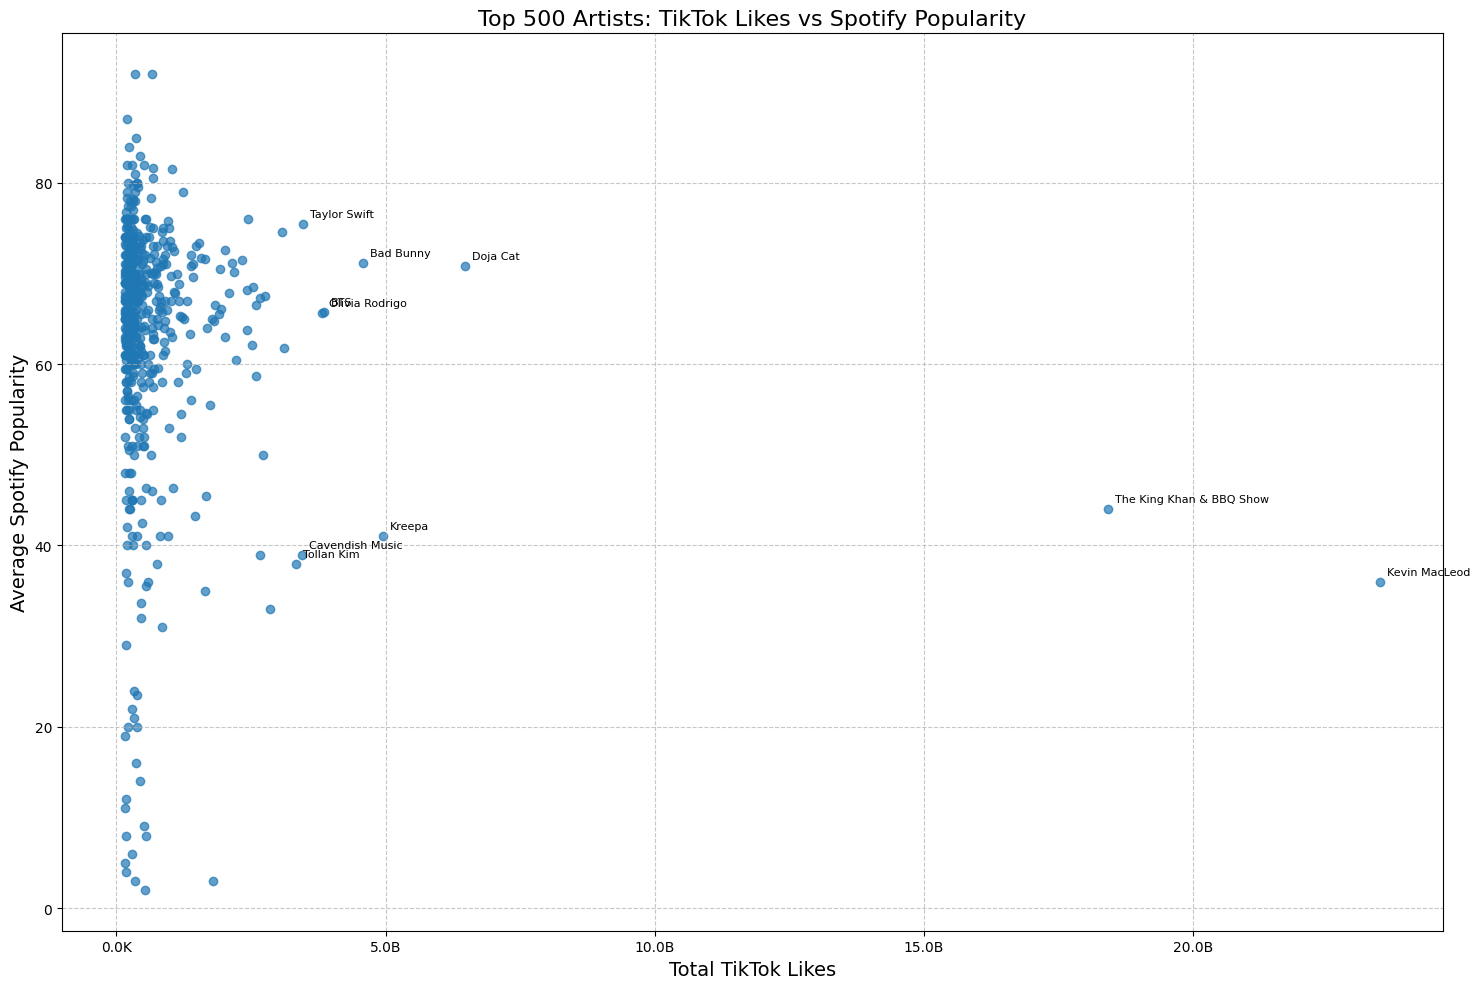

Correlation between TikTok Likes and Spotify Popularity for top 500 artists: -0.0970

Statistics for Top 500 artists:
Average Total TikTok Likes: 701,287,561
Average Spotify Popularity: 62.70
Highest Total TikTok Likes: 23,474,223,833
Highest Average Spotify Popularity: 92.00

Top 10 Artists by TikTok Likes:
         Artist           TikTok Likes  Spotify Popularity
           Kevin MacLeod 23,474,223,833       36.00       
The King Khan & BBQ Show 18,422,696,340       44.00       
                Doja Cat  6,472,845,648       70.86       
                  Kreepa  4,959,548,763       41.00       
               Bad Bunny  4,574,175,191       71.22       
                     BTS  3,854,446,026       65.77       
          Olivia Rodrigo  3,822,383,958       65.60       
            Taylor Swift  3,462,138,949       75.51       
         Cavendish Music  3,448,214,061       39.00       
              Tollan Kim  3,341,284,543       38.00       


C:\Users\rdina\AppData\Local\Temp\ipykernel_12700\1505929628.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_artists['TikTok Likes'] = top_10_artists['TikTok Likes'].apply(lambda x: f'{x:,.0f}')
C:\Users\rdina\AppData\Local\Temp\ipykernel_12700\1505929628.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_artists['Spotify Popularity'] = top_10_artists['Spotify Popularity'].apply(lambda x: f'{x:.2f}')


In [27]:
# Aggregate data by artist
artist_data = spotify_likes_data_clean.groupby('Artist').agg({
    'TikTok Likes': 'sum',
    'Spotify Popularity': 'mean'
}).reset_index()

# Sort by TikTok Likes and get top 500
top_500_artists = artist_data.sort_values('TikTok Likes', ascending=False).head(500)

def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x/1e3:.1f}K'

# Create the scatter plot
plt.figure(figsize=(15, 10))
plt.scatter(top_500_artists['TikTok Likes'], top_500_artists['Spotify Popularity'], alpha=0.7)

# Set labels and title
plt.xlabel('Total TikTok Likes', fontsize=14)
plt.ylabel('Average Spotify Popularity', fontsize=14)
plt.title('Top 500 Artists: TikTok Likes vs Spotify Popularity', fontsize=16)

# Format x-axis ticks
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate some top artists
for i, row in top_500_artists.head(10).iterrows():
    plt.annotate(row['Artist'], (row['TikTok Likes'], row['Spotify Popularity']), 
                 xytext=(5,5), textcoords='offset points', fontsize=8)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation for the top 500
correlation = top_500_artists['TikTok Likes'].corr(top_500_artists['Spotify Popularity'])
print(f"Correlation between TikTok Likes and Spotify Popularity for top 500 artists: {correlation:.4f}")

# Print some statistics
print("\nStatistics for Top 500 artists:")
print(f"Average Total TikTok Likes: {top_500_artists['TikTok Likes'].mean():,.0f}")
print(f"Average Spotify Popularity: {top_500_artists['Spotify Popularity'].mean():.2f}")
print(f"Highest Total TikTok Likes: {top_500_artists['TikTok Likes'].max():,.0f}")
print(f"Highest Average Spotify Popularity: {top_500_artists['Spotify Popularity'].max():.2f}")

# Format and print top 10 artists by TikTok Likes
print("\nTop 10 Artists by TikTok Likes:")
top_10_artists = top_500_artists.head(10)

# Format TikTok Likes
top_10_artists['TikTok Likes'] = top_10_artists['TikTok Likes'].apply(lambda x: f'{x:,.0f}')

# Format Spotify Popularity
top_10_artists['Spotify Popularity'] = top_10_artists['Spotify Popularity'].apply(lambda x: f'{x:.2f}')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')

# Print the formatted dataframe
print(top_10_artists.to_string(index=False))

# Reset display options to default
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.colheader_justify')

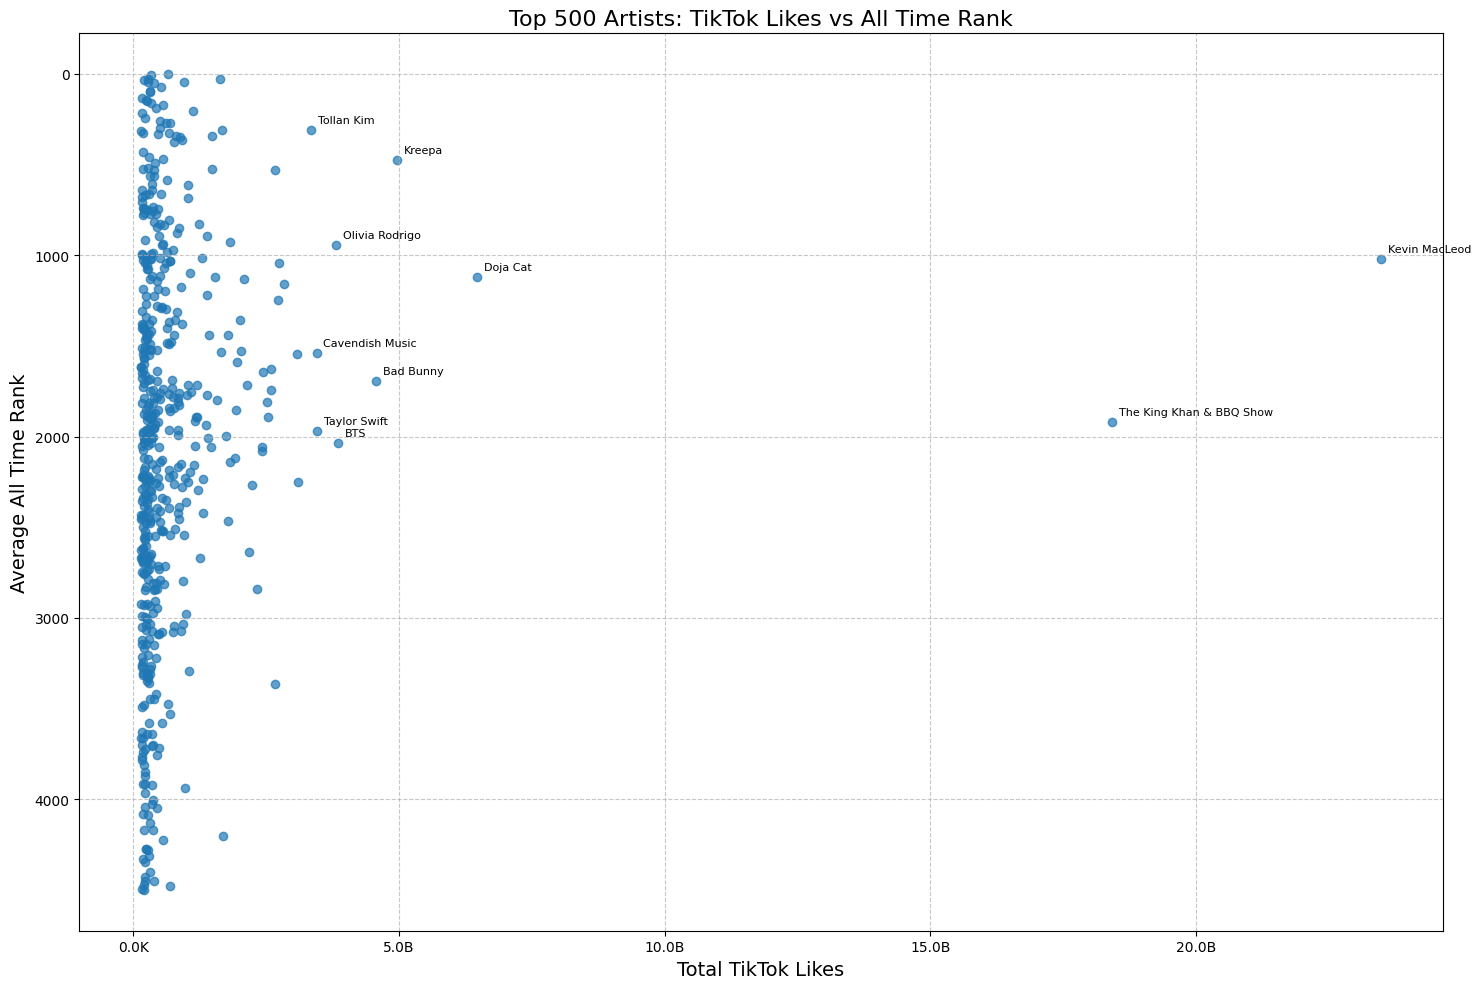

Correlation between TikTok Likes and All Time Rank for top 500 artists: -0.1202

Statistics for Top 500 artists:
Average Total TikTok Likes: 701,287,561
Average All Time Rank: 2032.63
Highest Total TikTok Likes: 23,474,223,833
Best (Lowest) Average All Time Rank: 1.00

Top 10 Artists by TikTok Likes:
         Artist           TikTok Likes  All Time Rank
           Kevin MacLeod 23,474,223,833    1018.00   
The King Khan & BBQ Show 18,422,696,340    1918.00   
                Doja Cat  6,472,845,648    1120.00   
                  Kreepa  4,959,548,763     473.00   
               Bad Bunny  4,574,175,191    1690.93   
                     BTS  3,854,446,026    2037.46   
          Olivia Rodrigo  3,822,383,958     942.50   
            Taylor Swift  3,462,138,949    1970.29   
         Cavendish Music  3,448,214,061    1539.00   
              Tollan Kim  3,341,284,543     307.50   


C:\Users\rdina\AppData\Local\Temp\ipykernel_12700\1027336569.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_artists['TikTok Likes'] = top_10_artists['TikTok Likes'].apply(lambda x: f'{x:,.0f}')
C:\Users\rdina\AppData\Local\Temp\ipykernel_12700\1027336569.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_artists['All Time Rank'] = top_10_artists['All Time Rank'].apply(lambda x: f'{x:.2f}')


In [28]:
# Aggregate data by artist
artist_data = spotify_likes_data_clean.groupby('Artist').agg({
    'TikTok Likes': 'sum',
    'All Time Rank': 'mean'  # Changed from 'Spotify Popularity' to 'All Time Rank'
}).reset_index()

# Sort by TikTok Likes and get top 500
top_500_artists = artist_data.sort_values('TikTok Likes', ascending=False).head(500)

def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x/1e3:.1f}K'

# Create the scatter plot
plt.figure(figsize=(15, 10))
plt.scatter(top_500_artists['TikTok Likes'], top_500_artists['All Time Rank'], alpha=0.7)

# Set labels and title
plt.xlabel('Total TikTok Likes', fontsize=14)
plt.ylabel('Average All Time Rank', fontsize=14)
plt.title('Top 500 Artists: TikTok Likes vs All Time Rank', fontsize=16)

# Format x-axis ticks
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Invert y-axis so that lower ranks (better) are at the top
plt.gca().invert_yaxis()

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate some top artists
for i, row in top_500_artists.head(10).iterrows():
    plt.annotate(row['Artist'], (row['TikTok Likes'], row['All Time Rank']), 
                 xytext=(5,5), textcoords='offset points', fontsize=8)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation for the top 500
correlation = top_500_artists['TikTok Likes'].corr(top_500_artists['All Time Rank'])
print(f"Correlation between TikTok Likes and All Time Rank for top 500 artists: {correlation:.4f}")

# Print some statistics
print("\nStatistics for Top 500 artists:")
print(f"Average Total TikTok Likes: {top_500_artists['TikTok Likes'].mean():,.0f}")
print(f"Average All Time Rank: {top_500_artists['All Time Rank'].mean():.2f}")
print(f"Highest Total TikTok Likes: {top_500_artists['TikTok Likes'].max():,.0f}")
print(f"Best (Lowest) Average All Time Rank: {top_500_artists['All Time Rank'].min():.2f}")

# Format and print top 10 artists by TikTok Likes
print("\nTop 10 Artists by TikTok Likes:")
top_10_artists = top_500_artists.head(10)

# Format TikTok Likes
top_10_artists['TikTok Likes'] = top_10_artists['TikTok Likes'].apply(lambda x: f'{x:,.0f}')

# Format All Time Rank
top_10_artists['All Time Rank'] = top_10_artists['All Time Rank'].apply(lambda x: f'{x:.2f}')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')

# Print the formatted dataframe
print(top_10_artists.to_string(index=False))

# Reset display options to default
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.colheader_justify')